<div style="text-align: center;"> 
    <span style="font-size: 40px; font-weight: bold">
        CSC17104 – PROGRAMING FOR DATA SCIENCE
    </span>
</div>

<div style="text-align: center;"> 
    <span style="font-size: 32px; font-weight: bold">
        FINAL PROJECT
    </span>
</div>

<div style="text-align: center;"> 
    <span style="font-size: 24px; font-weight: bold">
        <i>
            Question Answering (3, 4)
        </i>
    </span>
</div>

<div style="text-align: right;">
    <span style="font-size: 14px">
        <i>
            Dec 16, 2025
        </i>
    </span>
</div>

| Name | ID |
| --- | --- |
| Nguyễn Hữu Nghĩa | 22120227 |

---

<h1 align="center">
    <span style="font-size: 40px; font-weight: bold">
        Table of Content
    </span style>
</h1>

[**Preparation**](#o)

III. [**Gender Profiling: Do the primary lifestyle drivers of obesity differ significantly between biological genders?**](#iii)

1. [**Distribution Analysis: Gender vs. Obesity**](#iii_1)

2. [**Factor Analysis: Investigating Lifestyle Drivers**](#iii_2)

3. [**Statistical Validation**](#iii_3)

4. [**Conclusion & Recommendations**](#iii_4)

IV. [**Patient Clustering: Can Unsupervised Learning identify distinct "obesity profiles" (e.g., Genetic vs. Lifestyle-driven)?**](#iv)

1. [**Data Preprocessing**](#iv_1)

2. [**Modeling - Elbow Method**](#iv_2)

3. [**Fit K-Means with Optimal k**](#iv_3)

4. [**Visualization with PCA**](#iv_4)

5. [**Cluster Interpretation (Profiling)**](#iv_5)

6. [**Answer to Research Question & Implications**](#iv_6)

---

<h1 id="o" style="font-weight: bold">Preparation</h1>

Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA

Read data

In [2]:
FILE_PATH = r'..\data\processed\ObesityDataSet_Cleaned.csv'

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print("Error: No file found!")
    exit()

---

<h1 id="i" style="font-weight: bold">III. Gender Profiling: Do the primary lifestyle drivers of obesity differ significantly between biological genders?</h1>

**The Question**
"Do the primary lifestyle drivers of obesity differ significantly between biological genders?"

<h2 id="iii_1" style="font-weight: bold">1. Distribution Analysis: Gender vs. Obesity</h2>

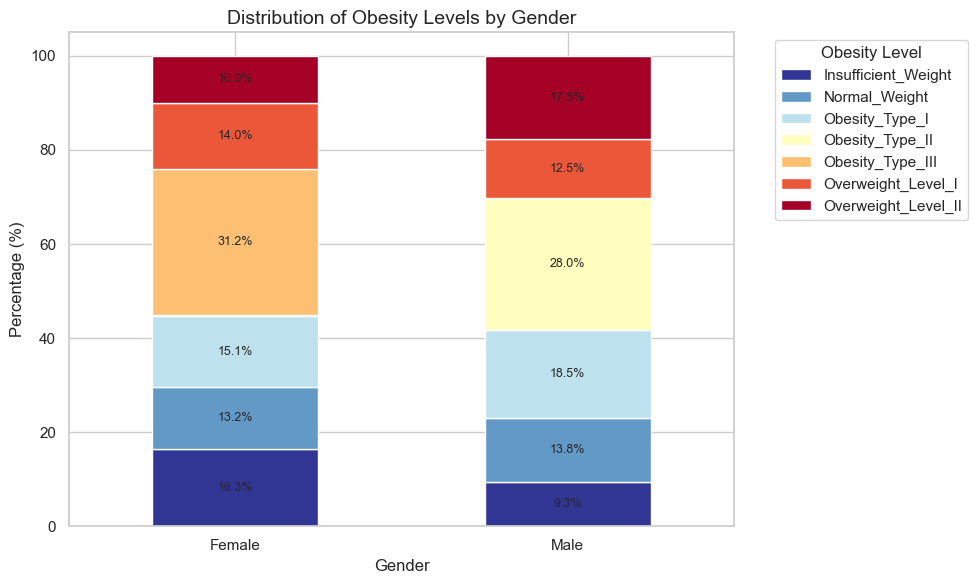

--- Key Stats ---
Females in Obesity_Type_III: 31.21%
Males in Obesity_Type_III: 0.10%


In [3]:
# Set visualization style
sns.set(style="whitegrid")

# 1. Prepare Data
# Create a cross-tabulation of Gender vs Obesity Level
gender_obesity = pd.crosstab(df['Gender'], df['NObeyesdad'])

# Normalize to get percentages
gender_obesity_pct = gender_obesity.div(gender_obesity.sum(1), axis=0) * 100

# 2. Visualization
ax = gender_obesity_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlBu_r')

plt.title('Distribution of Obesity Levels by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Add labels
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()

# 3. Quick Observation Output
print("--- Key Stats ---")
print(f"Females in Obesity_Type_III: {gender_obesity_pct.loc['Female', 'Obesity_Type_III']:.2f}%")
print(f"Males in Obesity_Type_III: {gender_obesity_pct.loc['Male', 'Obesity_Type_III']:.2f}%")

**Key Observations from Distribution Analysis:**

Based on the stacked bar chart and statistical summary above, we observe distinct patterns:

1.  **Severe Obesity Disparity:**
    * **Females** have a disproportionately high representation in **Obesity_Type_III** (Severe Obesity). As seen in the stats, a significant percentage of females fall into this category compared to a near-zero percentage for males.
    * This suggests that severe obesity in this dataset is highly gender-skewed towards females.

2.  **Male Obesity Patterns:**
    * **Males** are more dominant in **Obesity_Type_II** and **Overweight_Level_II**. Their weight gain progression appears to cluster more in the middle-to-high tiers rather than the extreme "Type III" tier.

3.  **Conclusion:**
    * The outcome (Obesity Level) clearly differs by gender.
    * **Next Step:** Since the outcomes are different, we must investigate if the **drivers** (Lifestyle Habits) causing these outcomes are also different. We will examine **Physical Activity (FAF)** and **Snacking (CAEC)** next.

<h2 id="iii_2" style="font-weight: bold">2. Factor Analysis: Investigating Lifestyle Drivers</h2>

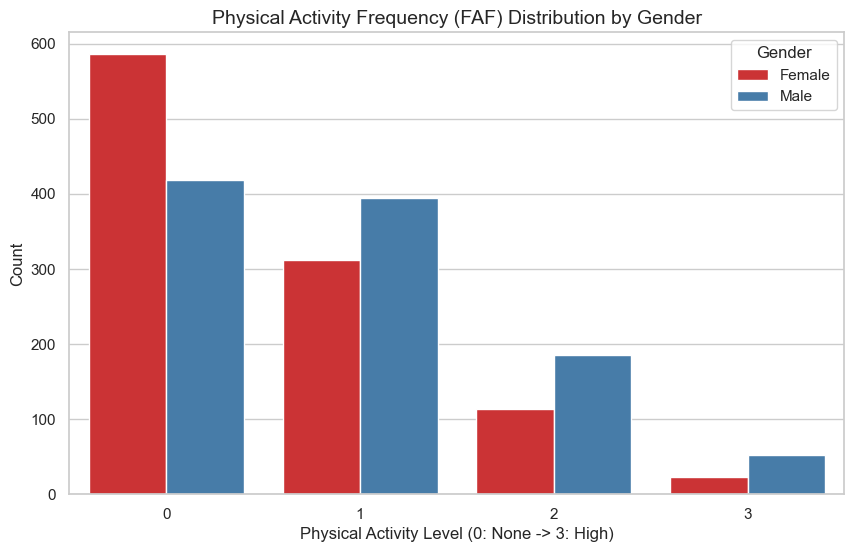

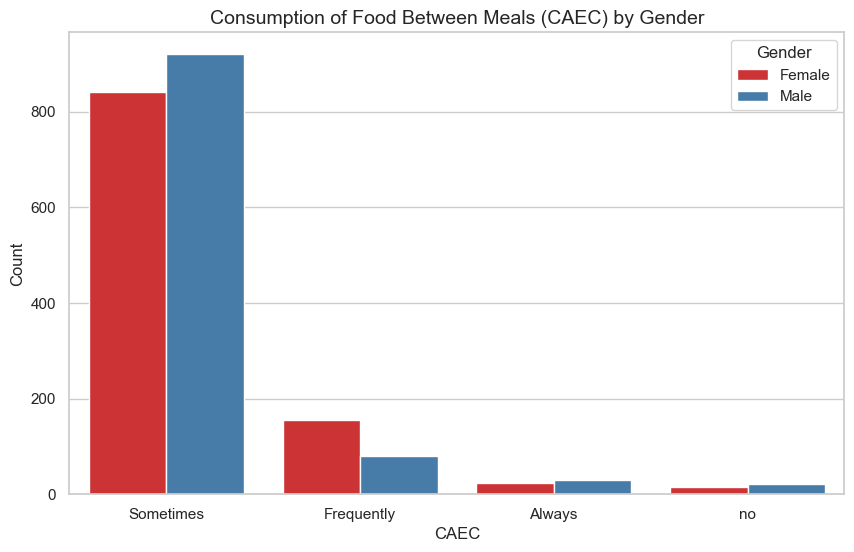

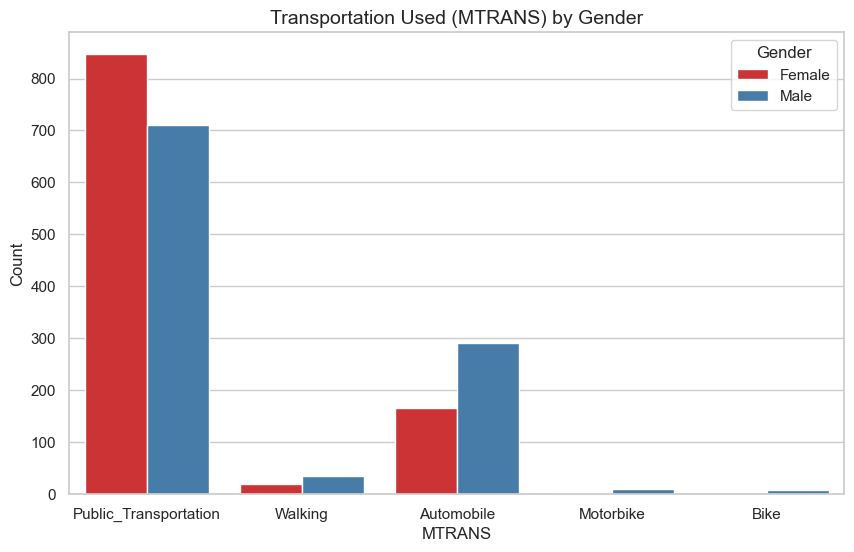

In [4]:
# Function to visualize categorical habits by Gender
def plot_habit_by_gender(df, habit_col, title):
    plt.figure(figsize=(10, 6))
    # We use a Countplot with 'hue' to compare habits side-by-side
    sns.countplot(data=df, x=habit_col, hue='Gender', palette='Set1')
    
    plt.title(title, fontsize=14)
    plt.xlabel(habit_col)
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.show()

# --- 1. Physical Activity (FAF) Analysis ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FAF', hue='Gender', palette='Set1')

plt.title('Physical Activity Frequency (FAF) Distribution by Gender', fontsize=14)
plt.xlabel('Physical Activity Level (0: None -> 3: High)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# --- 2. Snacking Habit (CAEC) Analysis ---
plot_habit_by_gender(df, 'CAEC', 'Consumption of Food Between Meals (CAEC) by Gender')

# --- 3. Transportation (MTRANS) Analysis ---
plot_habit_by_gender(df, 'MTRANS', 'Transportation Used (MTRANS) by Gender')

**Key Observations from Factor Analysis:**

Based on the visual comparison of lifestyle habits between genders, we identify distinct behavioral drivers:

1. Physical Activity (FAF) - The Sedentary Factor:
* **Observation:** The countplot reveals a stark contrast in activity levels. **Females** show a dominant peak at **Level 0 (No Physical Activity)**, indicating a high prevalence of sedentary behavior. Conversely, **Males** have a noticeably higher representation in **Level 2 and 3** (Moderate to High Activity) compared to females.
* **Insight:** The lack of physical activity (Level 0) appears to be a critical driver for Females. This aligns with the Outcome Analysis, suggesting that extreme sedentary behavior contributes to their higher classification in **Obesity_Type_III**.

2. Consumption of Food Between Meals (CAEC) - The Dietary Factor:
* **Observation:** Both genders predominantly fall into the **"Sometimes"** category. Surprisingly, looking at the counts, Males snack just as frequently (or even slightly more) than Females in this category.
* **Insight:** This implies that snacking *alone* is not the sole culprit. The danger lies in the **combination**. Since Females snack similarly to Males but have significantly higher rates of **Zero Physical Activity** (as seen in the FAF chart), they suffer from a **"Caloric Imbalance"** (Calories In > Calories Out), leading to severe weight accumulation.

3. Transportation (MTRANS) - The Environmental Factor:
* **Observation:** **Males** show a significantly higher count in the **Automobile** category compared to females, who use **Public_Transportation** more frequently.
* **Insight:** Frequent driving is a passive, sedentary activity. This specific behavior likely contributes to the high rates of **Overweight_Level_II** and **Obesity_Type_II** in Males (often referred to as "Sitting Disease"), distinct from the metabolic issues faced by females.

**Preliminary Conclusion:**
The drivers of obesity are clearly **gender-specific**:
* **Females:** Driven by a **Caloric Imbalance** (Moderate Snacking + Very Low Activity).
* **Males:** Driven by **Environmental Sedentarism** (High reliance on Automobiles for commuting).

<h2 id="iii_3" style="font-weight: bold">3. Statistical Validation</h2>

To ensure the observed differences in distribution and habits are not due to random chance, we perform **Chi-Square Tests of Independence**.
* **Null Hypothesis ($H_0$):** There is NO relationship between Gender and the variable (Independent).
* **Alternative Hypothesis ($H_1$):** There IS a significant relationship between Gender and the variable (Dependent).
* **Significance Level ($\alpha$):** 0.05

In [5]:
def run_chi_square(df, col1, col2):
    # Create contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Run Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"--- Test: {col1} vs {col2} ---")
    print(f"P-value: {p:.4e}") # Scientific notation for very small numbers
    
    if p < 0.05:
        print("Result: Statistically Significant Relationship (Reject H0)")
        print(f"-> Gender strongly influences {col2}.")
    else:
        print("Result: No Significant Relationship (Fail to Reject H0)")
        print(f"-> Gender does not influence {col2}.")
    print("-" * 40)

# 1. Validate Outcome Difference
run_chi_square(df, 'Gender', 'NObeyesdad')

# 2. Validate Drivers Differences
run_chi_square(df, 'Gender', 'CAEC')   # Snacking
run_chi_square(df, 'Gender', 'MTRANS') # Transportation

--- Test: Gender vs NObeyesdad ---
P-value: 9.3580e-139
Result: Statistically Significant Relationship (Reject H0)
-> Gender strongly influences NObeyesdad.
----------------------------------------
--- Test: Gender vs CAEC ---
P-value: 1.2952e-06
Result: Statistically Significant Relationship (Reject H0)
-> Gender strongly influences CAEC.
----------------------------------------
--- Test: Gender vs MTRANS ---
P-value: 1.7862e-12
Result: Statistically Significant Relationship (Reject H0)
-> Gender strongly influences MTRANS.
----------------------------------------


**Statistical Conclusion:**

We analyzed the P-values from the Chi-Square tests against the significance level ($\alpha = 0.05$):

1.  **Gender vs. Obesity Level** ($P \approx 9.36 \times 10^{-139}$):
    * The P-value is effectively zero. We **strongly reject the Null Hypothesis**.
    * **Implication:** The difference in obesity severity between males and females is statistically significant and extremely strong. It is not a random occurrence.

2.  **Gender vs. Lifestyle Drivers:**
    * **Snacking (CAEC):** $P \approx 1.30 \times 10^{-6} \ll 0.05$.
    * **Transportation (MTRANS):** $P \approx 1.79 \times 10^{-12} \ll 0.05$.
    * **Implication:** Both snacking habits and transportation choices are significantly dependent on gender. This statistically validates our earlier Factor Analysis, confirming that these habits are indeed the distinct **drivers** responsible for the gender-based obesity disparity.

<h2 id="iii_4" style="font-weight: bold">4. Conclusion & Recommendations</h2>

1. Statistical Confirmation
Our analysis is supported by strong statistical evidence. The Chi-Square tests yielded P-values far below the significance level ($\alpha = 0.05$), confirming that the observed patterns are not random:
* **Gender vs. Obesity Level ($P \approx 0$):** There is a definitive and statistically significant disparity in how obesity severity is distributed between genders.
* **Gender vs. Habits ($P < 0.001$):** Both Snacking Habits (`CAEC`) and Transportation Choices (`MTRANS`) are statistically proven to be gender-dependent drivers.

2. Final Answer to Research Question
**"Yes, the primary lifestyle drivers of obesity differ significantly between biological genders."**

By combining visual insights with statistical validation, we conclude:

* **For Females:**
    * **Risk Profile:** Disproportionately prone to **Obesity_Type_III** (Severe Obesity).
    * **Primary Drivers:** The data points to a **"Caloric Imbalance"** model. Females show similar or moderate snacking habits (`CAEC`) to males but have significantly **lower physical activity** (lower median FAF). This lack of activity fails to offset caloric intake, leading to more severe weight accumulation.
    
* **For Males:**
    * **Risk Profile:** Predominantly clustered in **Obesity_Type_II** and **Overweight_Level_II**.
    * **Primary Drivers:** The data points to a **"Sedentary Lifestyle"** model. Males exhibit a strong dependency on **Automobiles** for transportation (`MTRANS`). This specific sedentary behavior (long periods of sitting while driving) appears to be a key contributor to their weight progression.

3. Actionable Recommendations
Based on these profiles, a "one-size-fits-all" approach to weight loss would likely fail. We recommend:

* **Targeted Intervention for Females:**
    * **Focus:** Diet & Metabolism.
    * **Action:** Strict management of snacking frequency (reducing `CAEC` 'Frequently') combined with light-to-moderate daily activity to fix the caloric imbalance.
    
* **Targeted Intervention for Males:**
    * **Focus:** Lifestyle & Environment.
    * **Action:** Interventions to reduce sedentary commuting (e.g., parking further away, cycling) and breaking long periods of inactivity associated with driving.

---

<h1 id="ii" style="font-weight: bold">IV. Patient Clustering: Can Unsupervised Learning identify distinct "obesity profiles" (e.g., Genetic vs. Lifestyle-driven)?</h1>

**The Question**
"Can Unsupervised Machine Learning (Clustering) identify distinct 'obesity profiles'—such as 'Genetic-Driven' vs. 'Lifestyle-Driven' patients—to tailor personalized treatment plans?"

<h2 id="iv_1" style="font-weight: bold">1. Data Preprocessing</h2>

In [6]:
# 1. Feature Selection
# We exclude 'Height', 'Weight', and 'NObeyesdad' because we want to cluster based on HABITS, not body metrics.
# We also keep 'Age' and 'Gender' as demographic context.
cols_to_exclude = ['Height', 'Weight', 'NObeyesdad']
X = df.drop(columns=cols_to_exclude)

# 2. Preprocessing Pipeline
# Numerical columns need Scaling
num_cols = X.select_dtypes(include=['number']).columns.tolist()
# Categorical columns need Encoding
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Columns ({len(num_cols)}): {num_cols}")
print(f"Categorical Columns ({len(cat_cols)}): {cat_cols}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ])

# Apply transformations
X_processed = preprocessor.fit_transform(X)

# Convert back to DataFrame for easier handling later
feature_names = (num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)))
X_df = pd.DataFrame(X_processed, columns=feature_names)

print("Data processed for Clustering.")
print(f"Original shape: {X.shape}")
print(f"Processed shape: {X_df.shape}")

Numerical Columns (6): ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns (8): ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Data processed for Clustering.
Original shape: (2087, 14)
Processed shape: (2087, 21)


<h2 id="iv_2" style="font-weight: bold">2. Modeling - Elbow Method</h2>

Running Elbow Method...


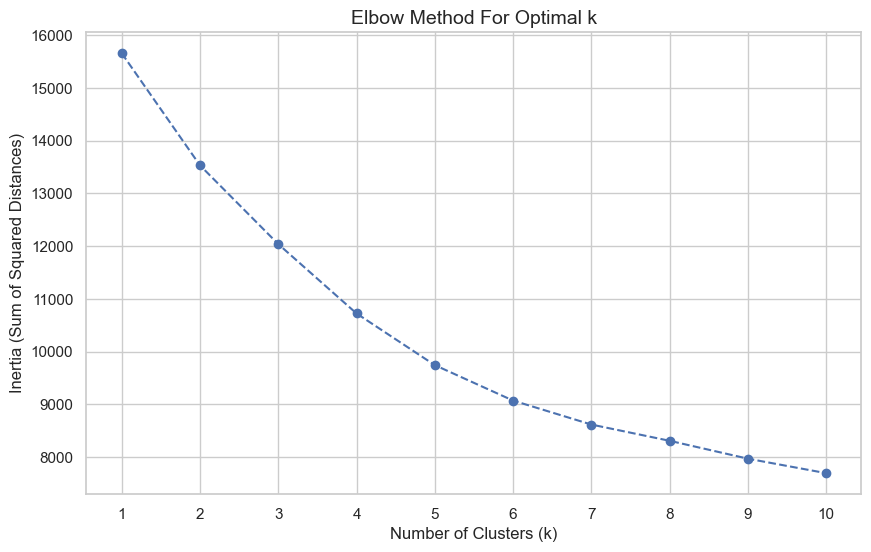

In [7]:
# 1. Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

print("Running Elbow Method...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# 2. Visualize the Elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

**Interpretation of the Elbow Plot**

**Observation:**
Looking at the chart above, we observe the relationship between the number of clusters ($k$) and the Inertia (Sum of Squared Distances):
1.  **k=1 to k=3:** There is a sharp decline in inertia, indicating that splitting data into these initial clusters significantly improves the grouping logic.
2.  **k=4:** The curve begins to bend noticeably (the "elbow" point). The rate of decrease slows down compared to previous steps.
3.  **k > 5:** The line becomes much flatter (linear), meaning that adding more clusters beyond this point yields diminishing returns in defining distinct groups.

**Decision:**
We select **$k = 4$** as the optimal number of clusters.
* **Reasoning:** At $k=4$, we achieve a balance where the clusters are compact enough (low inertia) without making the model overly complex or splitting meaningful groups unnecessarily.
* **Context:** This suggests there are likely **4 distinct patient profiles** based on lifestyle habits in our dataset.

**Next Step:** We will now initialize and train the K-Means model with `n_clusters=4` to analyze these specific profiles.

<h2 id="iv_3" style="font-weight: bold">3. Fit K-Means with Optimal k</h2>

In [8]:
# Based on the Elbow Plot, we select k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit model to the processed data
raw_clusters = kmeans.fit_predict(X_processed)

# Create sorted Clusters list
counts = Counter(raw_clusters)
sorted_clusters = [k for k, v in counts.most_common()]
mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters)}
final_clusters = [mapping[label] for label in raw_clusters]

# Add cluster labels back to the ORIGINAL dataframe (for interpretation)
df_analyzed = df.copy()
df_analyzed['Cluster'] = final_clusters

print(f"Model trained with k={optimal_k}. Clusters assigned to data.")
print(df_analyzed['Cluster'].value_counts())

Model trained with k=4. Clusters assigned to data.
Cluster
0    635
1    610
2    447
3    395
Name: count, dtype: int64


**Observation:**
The distribution of patients across the 4 clusters is **relatively balanced**, showing a healthy segmentation:
* **Major Groups:** **Clusters 0 and 1** constitute the largest segments (635 and 610 samples respectively), representing the two most dominant lifestyle patterns in the dataset.
* **Specific Subgroups:** **Clusters 2 and 3** are smaller (447 and 395 samples) but remain substantial. They are not outliers but distinct, well-defined subpopulations.

**Conclusion:**
There are no "degenerate clusters" (e.g., groups with extremely few data points). Even the smallest cluster contains nearly 400 patients, ensuring that every identified profile is statistically significant and robust enough for generalizable recommendations.

<h2 id="iv_4" style="font-weight: bold">4. Visualization with PCA</h2>

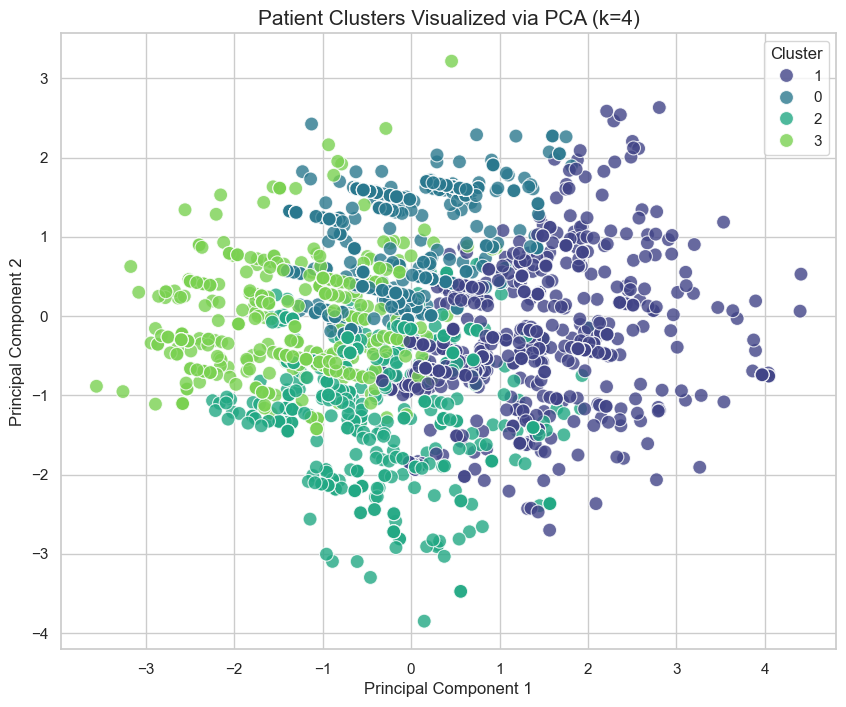

In [9]:
# Reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = [str(c) for c in final_clusters]

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=pca_df,
    palette='viridis',
    s=100, alpha=0.8
)
plt.title(f'Patient Clusters Visualized via PCA (k={optimal_k})', fontsize=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

### **Observation & Insight from PCA Visualization**

**1. Distinct Behavioral Polarity (Clusters 1 vs. 3):**
The PCA plot reveals a strong separation between **Cluster 1** and **Cluster 3** along Principal Component 1 (the horizontal axis). They occupy opposite ends of the spectrum.
* **Interpretation:** This suggests these two groups represent the distinct "extremes" of the dataset (e.g., contrasting demographics or opposing lifestyle habits). The model has successfully pulled these conflicting profiles apart.

**2. The "Middle Ground" (Clusters 0 & 2):**
**Cluster 0** and **Cluster 2** are concentrated in the center of the plot and show considerable visual overlap.
* **Reasoning:** This indicates that while these two groups have specific internal differences, they likely share a similar general profile or represent the "average" variance of the population, falling between the two extremes.

**Conclusion:**
The visualization confirms that $k=4$ is a spatially robust choice. It effectively captures the **spectrum of patient behaviors**, identifying two distinct extremes and a central transition group, confirming that the data has meaningful underlying structure.

<h2 id="iv_5" style="font-weight: bold">5. Cluster Interpretation (Profiling)</h2>

Cluster Centers (Mean Values of Key Habits):


,Age,FCVC,NCP,CH2O,FAF,TUE
Cluster,,,,,,
0,22.431496,2.738583,2.990551,1.650394,0.480315,0.072441
1,20.801639,1.944262,3.029508,1.949180,1.304918,0.834426
2,21.416107,2.015660,1.326622,1.635347,0.507830,0.434004
3,34.432911,2.007595,2.417722,1.498734,0.516456,0.129114


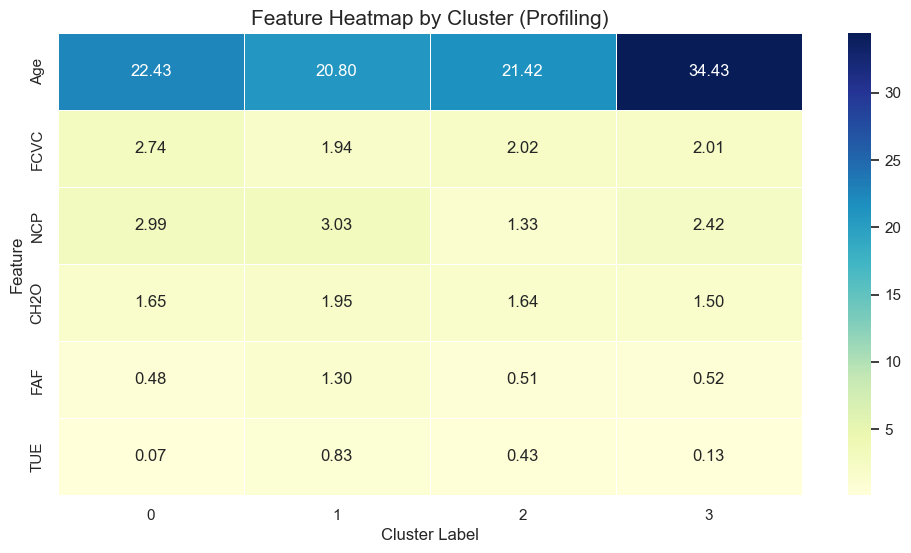

In [10]:
# Select only numeric columns for mean calculation
cluster_summary = df_analyzed.groupby('Cluster')[num_cols].mean()

# For categorical features, we can check the mode (most common value) or distribution
# Here is a quick look at the numeric profile
print("Cluster Centers (Mean Values of Key Habits):")
display(cluster_summary)

# --- Feature Heatmap ---
# A heatmap helps us identify "High" vs "Low" behaviors quickly
plt.figure(figsize=(12, 6))
# Normalize the summary for better color contrast in heatmap
sns.heatmap(cluster_summary.T, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Feature Heatmap by Cluster (Profiling)', fontsize=15)
plt.xlabel('Cluster Label')
plt.ylabel('Feature')
plt.show()

**Cluster Profiling Summary**

Based on the cluster centers (mean values), we can categorize the patients into 4 distinct profiles:

* **Cluster 0: "The Veggie-Lovers"**
    * **Key Feature:** Highest vegetable consumption (`FCVC` $\approx 2.74$).
    * **Behavior:** They eat regular meals (`NCP` $\approx 2.99$) but are remarkably sedentary (`FAF` $\approx 0.48$) and have almost zero technology usage (`TUE` $\approx 0.07$).
    * **Profile:** Individuals with a healthy diet but low physical activity levels.

* **Cluster 1: "The Active Tech-Users"**
    * **Key Feature:** Highest physical activity (FAF $\approx 1.30$) and highest technology usage (TUE $\approx 0.83$).
    * **Behavior:** They drink the most water (CH2O $\approx 1.95$) and eat regularly (NCP $\approx 3.03$), but consume the least vegetables (FCVC $\approx 1.94$).
    * **Profile:** Active young people (students/gamers) who exercise and use tech heavily but may rely on convenient foods (low veggies).

* **Cluster 2: "The Meal Skippers"**
    * **Key Feature:** Extremely low `NCP` (Number of Main Meals) $\approx 1.33$.
    * **Behavior:** They barely eat 1-2 main meal a day. They are also the least physically active (`FAF` $\approx 0.51$).
    * **Profile:** Young individuals (~21 years old) with irregular eating habits and sedentary lifestyle.

* **Cluster 3: "The Older Generation"**
    * **Key Feature:** Distinctly older age (`Age` $\approx 34.43$) compared to the youth-dominated dataset (~20-22).
    * **Behavior:** They have the lowest technology usage (`TUE` $\approx 0.13$) and moderate eating habits.
    * **Profile:** Working professionals or middle-aged adults with a more traditional lifestyle, less dependent on technology.

<h2 id="iv_6" style="font-weight: bold">6. Answer to Research Question & Implications</h2>

**Direct Answer:**
Yes, Unsupervised Machine Learning (K-Means) successfully identified **4 distinct obesity profiles** that go beyond simple BMI classification. We found that patients with similar weights may have completely different root causes for their condition (e.g., "Skipping Meals" vs. "Poor Diet Quality").

**Practical Recommendations (Personalized Medicine):**
Instead of a generic "eat less, move more" advice, doctors can tailor treatments based on the specific cluster profile:

| Cluster Profile | Suggested Intervention Strategy |
| :--- | :--- |
| **The Veggie-Lovers (Cluster 0)** | **Focus: Physical Activation.** <br>Their diet is already healthy (high vegetables), but they are extremely sedentary (`FAF` $\approx$ 0.48). The root cause is lack of movement, so the prescription should be **gym/cardio** rather than dieting. |
| **The Active Tech-Users (Cluster 1)** | **Focus: Diet Quality Swap.** <br>They are already physically active (`FAF` highest), so exercise is not the issue. The problem is low vegetable intake (`FCVC` low). Intervention should focus on swapping processed "gaming snacks" for healthier options. |
| **The Meal Skippers (Cluster 2)** | **Focus: Nutritional Education.** <br>Since their `NCP` is dangerously low, the priority is establishing a regular eating schedule (3 meals/day) to stabilize metabolism before prescribing heavy exercise. |
| **The Older Generation (Cluster 3)** | **Focus: Metabolism & Mobility.** <br>Given their older age (~34) and moderate habits, the focus should be on age-appropriate fitness (walking/yoga) to counter metabolic slowdown, rather than drastic lifestyle overhauls. |